In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from common_codes.utils import Utils
%matplotlib inline

In [2]:
df_index = pd.read_csv(Utils.get_file_path('economic_index.csv'))
df_index.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [3]:
df = df_index.drop(columns=['Unnamed: 0', 'year', 'month'])
df.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [4]:
df.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

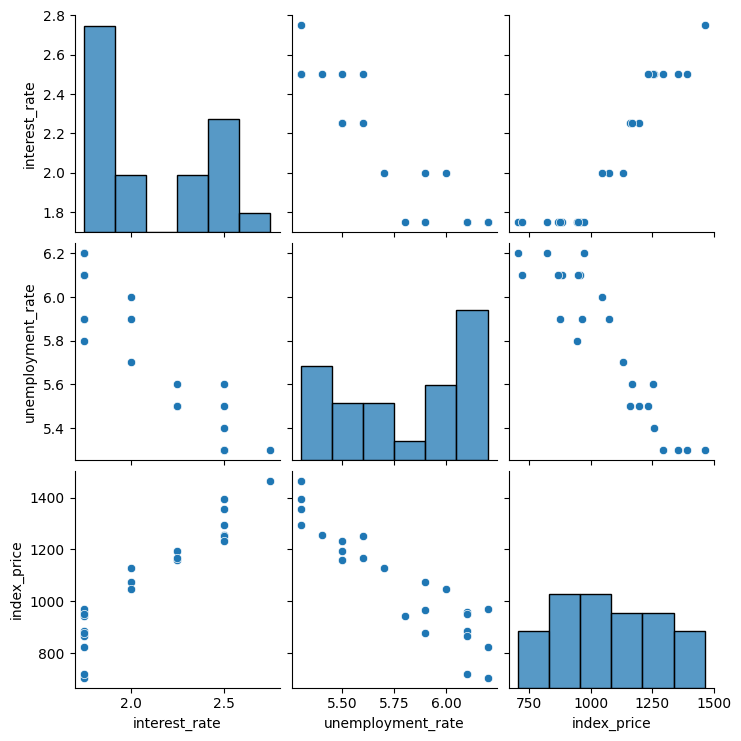

In [5]:
sns.pairplot(df)

In [6]:
df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


Text(0, 0.5, 'Unemployment Rate')

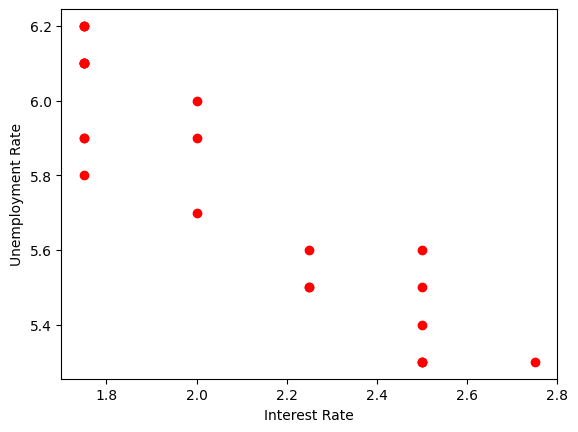

In [7]:
## Visualize data points more closely

plt.scatter(df['interest_rate'],df['unemployment_rate'],color='red')
plt.xlabel('Interest Rate')
plt.ylabel('Unemployment Rate')

In [8]:
## Independent and Dependent Features

'''
X = df[['interest_rate', 'unemployment_rate']]
y = df['index_price']
'''

## Another way to get X and y
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

<Axes: xlabel='interest_rate', ylabel='index_price'>

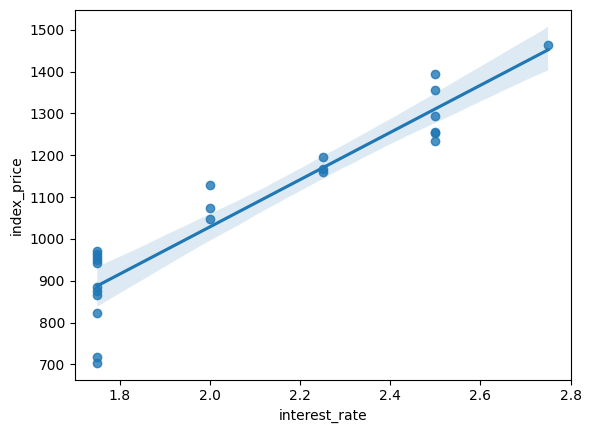

In [10]:
sns.regplot(x='interest_rate',y='index_price',data=df)

<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

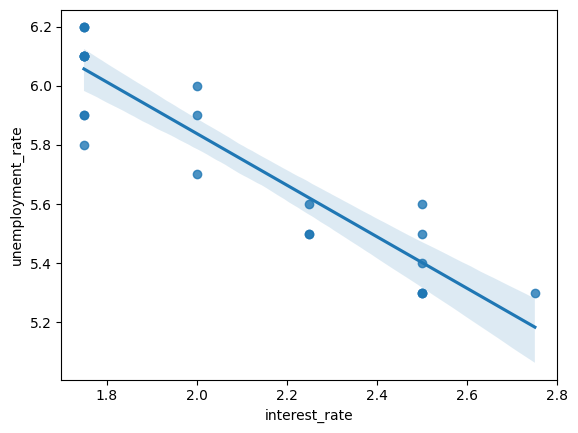

In [11]:
sns.regplot(x='interest_rate',y='unemployment_rate',data=df)

<Axes: xlabel='unemployment_rate', ylabel='index_price'>

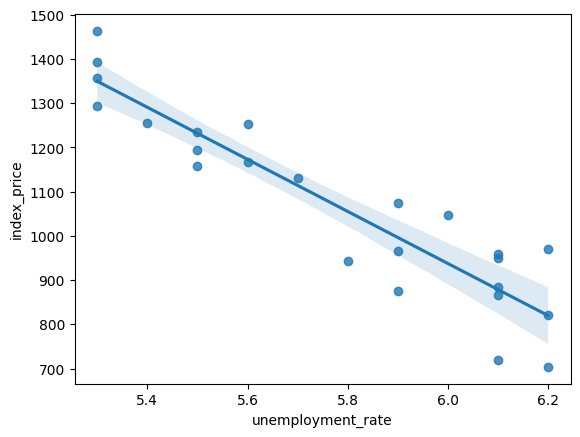

In [12]:
sns.regplot(x='unemployment_rate',y='index_price',data=df)

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
from sklearn.linear_model import LinearRegression

regression = LinearRegression()

regression.fit(X_train,y_train)


LinearRegression()

In [15]:
## Cross Validation

from sklearn.model_selection import cross_val_score
score = cross_val_score(regression,X_train,y_train,scoring='neg_mean_squared_error',cv=5)

np.mean(score)

-5662.72581214445

In [16]:
## Prediction

y_pred = regression.predict(X_test)

In [17]:
## Performance Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(mse)
print(mae)
print(rmse)

6957.105303258833
71.71878409976625
83.40926389351985


## Assumptions of Linear Regression

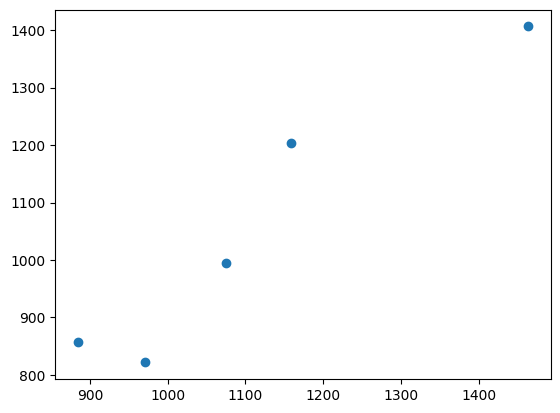

In [18]:
plt.scatter(y_test,y_pred)

## if the data points are on a straight line then the model is good

/var/folders/07/8j6bcwpn5_qfb0_tjmt2qg100000gn/T/ipykernel_85081/3092110573.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residual,kde=True)


<Axes: xlabel='index_price', ylabel='Density'>

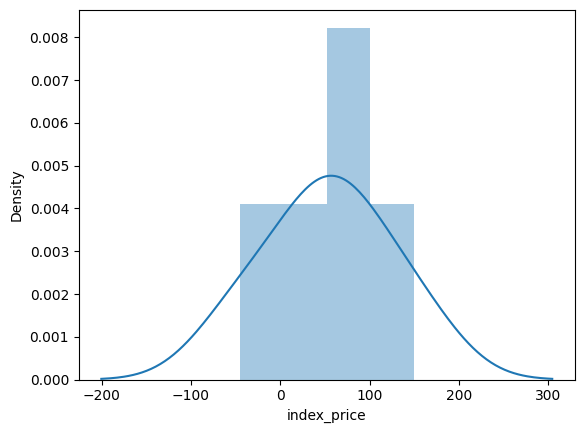

In [20]:
residual = y_test - y_pred
sns.distplot(residual,kde=True)

## If the residuals are normally distributed then the model is good

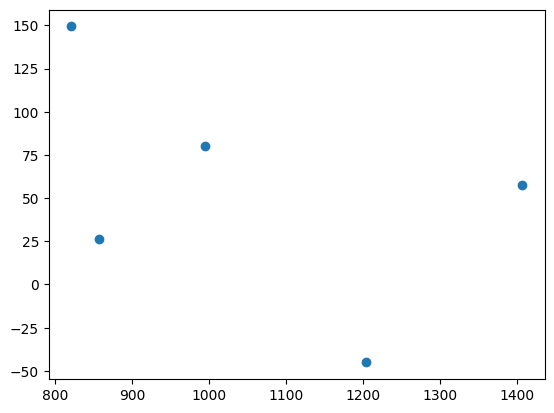

In [23]:
plt.scatter(y_pred,residual)


## if the residuals are randomly scattered then the model is good

In [24]:
## OLS Linear Regression

import statsmodels.api as sm

model = sm.OLS(y_train, X_train).fit()

prediction = model.predict(X_test)

model.summary()

/Users/murtuzasaifee/Documents/Personal/Codes/python_ml_nlp/venv/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=19 observations were given.
  return hypotest_fun_in(*args, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.033
Model:                            OLS   Adj. R-squared (uncentered):             -0.081
Method:                 Least Squares   F-statistic:                             0.2916
Date:                Tue, 22 Oct 2024   Prob (F-statistic):                       0.751
Time:                        15:23:49   Log-Likelihood:                         -159.34
No. Observations:                  19   AIC:                                      322.7
Df Residuals:                      17   BIC:                                      324.6
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            86.6335    647.232      0.134      0.895   -1278.906    1452.173
x2          -114.0486    647.232     -0.176      0.862   -1479.588    1251.491
==============================================================================
Omnibus:                        0.676   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.713   Jarque-Bera (JB):                0.526
Skew:                          -0.369   Prob(JB):                        0.769
Kurtosis:                       2.656   Cond. No.                         4.82
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""